In [1]:
import os

#add the root directory
os.chdir('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
from PCAfold import normalized_variance_derivative, cost_function_normalized_variance_derivative
import numpy as np
import pandas as pd
import torch
from loader import *
import matplotlib.pyplot as plt
import h5py
import matplotlib.ticker as ticker
import matplotlib.cm as cm

<h2> Effect of the scaling layer on the manifold quality

Costs computed here for DNS are with a power of 1

In [3]:
#kernel regression MSE values without scaling layer
MSE_without = [ 2.275, 2.269, 2.26, 2.256, 2.254, 2.229, 2.258, 2.277, 2.241, 2.209,
                2.136, 2.137, 2.248, 2.152, 2.171, 2.149, 2.179, 2.152, 2.132, 2.127,
                2.213, 2.244, 2.219, 2.239, 2.214, 2.195, 2.212, 2.237, 2.206, 2.218,
                2.196, 2.198, 2.203, 2.197, 2.215, 2.226, 2.219, 2.189, 2.215, 2.215,
                2.211, 2.201, 2.21, 2.182, 2.187, 2.206, 2.192, 2.185, 2.18, 2.179]

#validation MSE from the training

MSEtr_without = [
        1.91, 1.93, 1.98, 2.05, 1.81, 2.09, 2.03, 1.81, 1.86, 1.8,  
        3.75, 3.13, 3.5, 3.86, 3.59, 3.42, 3.48, 3.89, 3.72, 2.73, 
        1.43, 1.48, 1.53, 1.49, 1.47, 1.47, 1.38, 1.48, 1.53, 1.48,
        1.47, 1.41, 1.45, 1.46, 1.45, 1.45, 1.44, 1.5, 1.46, 1.48,
        1.56, 1.43, 1.46, 1.54, 1.55, 1.48, 1.51, 1.46, 1.48, 1.51]

#cost function values without scaling layer
cost_without = [0.44993, 0.44826, 0.45187, 0.44439, 0.45474, 0.44626, 0.44825, 0.45165, 0.4472, 0.45125,
                0.47117, 0.47591, 0.45665, 0.46589, 0.47408, 0.46583, 0.47425, 0.476, 0.46876, 0.47511,
                0.46041, 0.46052, 0.46166, 0.46447, 0.46263, 0.46221, 0.46609, 0.45746, 0.46024, 0.46239,
                0.4609, 0.46384, 0.46412, 0.46356, 0.46407, 0.46633, 0.46793, 0.46145, 0.46568, 0.46339,
                0.46719, 0.46575, 0.46483, 0.46764, 0.46602, 0.46835, 0.46884, 0.46052, 0.46539, 0.46718]

MSE_35aW = [2.275, 2.269, 2.26, 2.256, 2.254, 2.229, 2.258, 2.277, 2.241, 2.209]
MSEtr_35aW = [1.91, 1.93, 1.98, 2.05, 1.81, 2.09, 2.03, 1.81, 1.86, 1.8]
cost_35aW = [0.44993, 0.44826, 0.45187, 0.44439, 0.45474, 0.44626, 0.44825, 0.45165, 0.4472, 0.45125]

MSE_32g = [2.167, 2.192, 2.17, 2.195, 2.171, 2.349, 2.179, 2.18, 2.138, 2.165]
MSEtr_32g = [3.46, 3.4, 4.11, 3.3, 3.59, 3.86, 3.48, 3.72, 3.31, 3.41] 
cost_32g = [0.47784, 0.47162, 0.47781, 0.47576, 0.47408, 0.46077, 0.47425, 0.48175, 0.45034, 0.4699]

MSE_32j = [2.136, 2.137, 2.248, 2.152, 2.171, 2.149, 2.179, 2.152, 2.132, 2.127]
MSEtr_32j = [3.75, 3.13, 3.5, 3.86, 3.59, 3.42, 3.48, 3.89, 3.72, 2.73] 
cost_32j = [0.47117, 0.47591, 0.45665, 0.46589, 0.47408, 0.46583, 0.47425, 0.476, 0.46876, 0.47511]

MSE_35abW = [2.213, 2.244, 2.219, 2.239, 2.214, 2.195, 2.212, 2.237, 2.206, 2.218]
MSEtr_35abW = [1.43, 1.48, 1.53, 1.49, 1.47, 1.47, 1.38, 1.48, 1.53, 1.48]
cost_35abW = [0.46041, 0.46052, 0.46166, 0.46447, 0.46263, 0.46221, 0.46609, 0.45746, 0.46024, 0.46239]

MSE_tscaleW = [2.196, 2.198, 2.203, 2.197, 2.215, 2.226, 2.219, 2.189, 2.215, 2.215]
MSEtr_tscaleW = [1.47, 1.41, 1.45, 1.46, 1.45, 1.45, 1.44, 1.5, 1.46, 1.48]
cost_tscaleW = [0.4609, 0.46384, 0.46412, 0.46356, 0.46407, 0.46633, 0.46793, 0.46145, 0.46568, 0.46339]

MSE_35acW = [2.211, 2.201, 2.21, 2.182, 2.187, 2.206, 2.192, 2.185, 2.18, 2.179]
MSEtr_35acW = [1.56, 1.43, 1.46, 1.54, 1.55, 1.48, 1.51, 1.46, 1.48, 1.51]
cost_35acW = [0.46719, 0.46575, 0.46483, 0.46764, 0.46602, 0.46835, 0.46884, 0.46052, 0.46539, 0.46718]

#kernel regression MSE values with scaling layer
MSE_with = [
    2.154, 2.155, 2.239, 2.157, 2.215, 2.187, 2.139, 2.109, 2.231, 2.185,
    2.159, 2.172, 2.186, 2.15, 2.167, 2.146, 2.192, 2.179, 2.159, 2.205,
    2.182, 2.147, 2.259, 2.419, 2.137, 2.583, 2.162, 2.333, 2.186, 2.145,
    2.152, 2.139, 2.196, 2.165, 2.156, 2.134, 2.187, 2.133, 2.134, 2.143,
    2.186, 2.169, 2.224, 2.182, 2.216, 2.162, 2.215, 2.186, 2.2, 2.224]

MSEtr_with = [
        1.79, 2.08, 2.23, 1.7, 1.97, 1.8, 1.8, 1.78, 1.73, 1.92, 
        1.35, 1.33, 1.29, 1.31, 1.32, 1.28, 1.28, 1.31, 1.32, 1.32, 
        2.88, 3.46, 2.86, 2.94, 3.49, 3.66, 2.84, 2.96, 2.97, 2.13, 
        1.28, 1.34, 1.34, 1.38, 1.3, 1.36, 1.29, 1.33, 1.29, 1.34,
        1.46, 1.34, 1.45, 1.64, 1.4, 1.42, 1.54, 1.42, 1.43, 1.47]

#cost function values with scaling layer
cost_with = [
0.40184, 0.40358, 0.40738, 0.40377, 0.39976, 0.40393, 0.40472, 0.40046, 0.40309, 0.40191,
0.41075, 0.41312, 0.41471, 0.41142, 0.41323, 0.41051, 0.42051, 0.41385, 0.41658, 0.41161,
0.45564, 0.45027, 0.4526, 0.4447, 0.46597, 0.39889, 0.47851, 0.45555, 0.44544, 0.44733,
0.41095, 0.41122, 0.41233, 0.41283, 0.41206, 0.40796, 0.41182, 0.41155, 0.40902, 0.41211,
0.42333, 0.41606, 0.42805, 0.43396, 0.43198, 0.42892, 0.44241, 0.41166, 0.42883, 0.43069]

MSE_35a = [2.154, 2.155, 2.239, 2.157, 2.215, 2.187, 2.139, 2.109, 2.231, 2.185]
MSEtr_35a = [1.79, 2.08, 2.23, 1.7, 1.97, 1.8, 1.8, 1.78, 1.73, 1.92] 
cost_35a = [0.40184, 0.40358, 0.40738, 0.40377, 0.39976, 0.40393, 0.40472, 0.40046, 0.40309, 0.40191]

MSE_tscale = [2.159, 2.172, 2.186, 2.15, 2.167, 2.146, 2.192, 2.179, 2.159, 2.205]
MSEtr_tscale = [1.35, 1.33, 1.29, 1.31, 1.32, 1.28, 1.28, 1.31, 1.32, 1.32] 
cost_tscale = [0.41075, 0.41312, 0.41471, 0.41142, 0.41323, 0.41051, 0.42051, 0.41385, 0.41658, 0.41161]

MSE_33b = [2.182, 2.147, 2.259, 2.419, 2.137, 2.583, 2.162, 2.333, 2.186, 2.145]
MSEtr_33b = [2.88, 3.46, 2.86, 2.94, 3.49, 3.66, 2.84, 2.96, 2.97, 2.13] 
cost_33b = [0.45564, 0.45027, 0.4526, 0.4447, 0.46597, 0.39889, 0.47851, 0.45555, 0.44544, 0.44733]

MSE_33d = [2.139, 2.154, 2.179, 2.168, 2.205, 2.183, 2.199, 2.176, 2.13, 2.153]
MSEtr_33d = [1.92, 2.05, 2.24, 1.63, 1.52, 1.76, 1.48, 1.84, 1.79, 1.67]
cost_33d = [0.43016, 0.42508, 0.43499, 0.44503, 0.46399, 0.44549, 0.4684, 0.44363, 0.4423, 0.4422]

MSE_35ab = [2.152, 2.139, 2.196, 2.165, 2.156, 2.134, 2.187, 2.133, 2.134, 2.143]
MSEtr_35ab = [1.28, 1.34, 1.34, 1.38, 1.3, 1.36, 1.29, 1.33, 1.29, 1.34]
cost_35ab = [0.41095, 0.41122, 0.41233, 0.41283, 0.41206, 0.40796, 0.41182, 0.41155, 0.40902, 0.41211]

MSE_35ac = [2.186, 2.169, 2.224, 2.182, 2.216, 2.162, 2.215, 2.186, 2.2, 2.224]
MSEtr_35ac = [1.46, 1.34, 1.45, 1.64, 1.4, 1.42, 1.54, 1.42, 1.43, 1.47]
cost_35ac = [0.42333, 0.41606, 0.42805, 0.43396, 0.43198, 0.42892, 0.44241, 0.41166, 0.42883, 0.43069]

<h3> Load the costs with a power of 4

In [8]:
path_variance = "data-files/costs/"


penalty_function = 'log-sigma-over-peak'
start_bw = -6
end_bw = 2
nbr_points_bw = 100
bandwidth_values = np.logspace(start_bw, end_bw, nbr_points_bw)
power = 4
vertical_shift = 1


namesWithout = ["Tr35aW", "Tr32j", "Tr35abW", "Tr32tFullW", "Tr35acW"] #Tr32tFullW is also the 32tscaleW
namesWith = ["Tr35a", "Tr32tscale", "Tr33b", "Tr35ab", "Tr35ac"]

cost_without = []
cost_with = []

cost_PVsource_without = []
cost_PVsource_with = []

def compute_avg(costs):
    n = len(costs)
    sum = np.sum(costs**2)
    return 1/n*np.sqrt(sum)

for idWithout, idWith in zip(namesWithout, namesWith):

    for i in range(10):

        #With scaling layer
        name_with = f"variance_{idWith}_s{i}-bw_-6_2_100.npy"
        variance_With= np.load(f"{path_variance}{name_with}", allow_pickle=True).item()
        costsWith = cost_function_normalized_variance_derivative(variance_With,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
        cost_with.append(compute_avg(np.array(costsWith)))
        cost_PVsource_with.append(costsWith[-1])

        #Without scaling layer
        name_without = f"variance_{idWithout}_s{i}-bw_-6_2_100.npy"
        variance_Without= np.load(f"{path_variance}{name_without}", allow_pickle=True).item()
        costsWithout = cost_function_normalized_variance_derivative(variance_Without,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
        cost_without.append(compute_avg(np.array(costsWithout)))
        cost_PVsource_without.append(costsWithout[-1])

## Load the MSE NN values

In [4]:
namesWithout = ["Tr35aW", "Tr32k", "Tr35abW", "Tr32tFullW", "Tr35acW"] #Tr32tFullW is also the 32tscaleW; Tr32k corresponds to 32j
namesWith = ["Tr35a", "Tr32tscaleFull", "Tr33b", "Tr35ab", "Tr35ac"]

MSE_NN_without = []
MSE_NN_with = []

path_MSE_NN = "data-files/MSE_NN/"

for nameWithout, nameWith in zip(namesWithout, namesWith):
    MSE_NN_without.append(np.load(f"{path_MSE_NN}MSE_Val_NN_{nameWithout}.npy"))
    MSE_NN_with.append(np.load(f"{path_MSE_NN}MSE_Val_NN_{nameWith}.npy"))

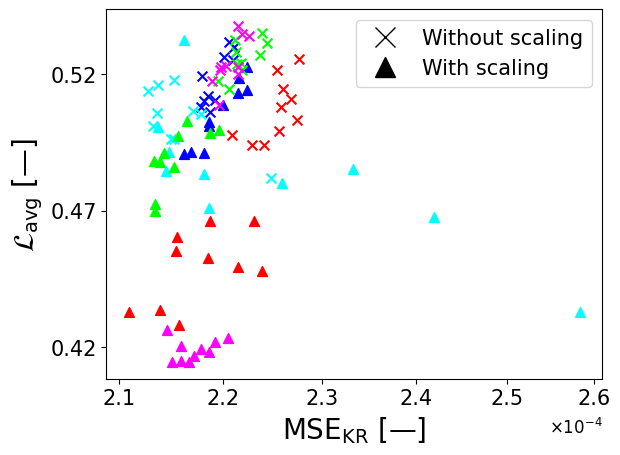

In [30]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/DNS/"
name = f"effect scaling - cost-MSEkr - DNS - power 4 - hyper - xlog.png"

size_marker = 50

plt.scatter(MSE_35aW, cost_without[0:10], c = "r", marker = "x", s=size_marker)
plt.scatter(MSE_35a, cost_with[0:10], c = "r", marker = "^", s=size_marker)

plt.scatter(MSE_35acW, cost_without[40:50], c = "b", marker = "x", s=size_marker)
plt.scatter(MSE_35ac, cost_with[40:50], c = "b", marker = "^", s=size_marker)

plt.scatter(MSE_32j, cost_without[10:20], c = "aqua", marker = "x", s=size_marker)
plt.scatter(MSE_33b, cost_with[20:30], c = "aqua", marker = "^", s=size_marker)

plt.scatter(MSE_35abW, cost_without[20:30], c = "lime", marker = "x", s=size_marker)
plt.scatter(MSE_35ab, cost_with[30:40], c = "lime", marker = "^", s=size_marker)

plt.scatter(MSE_tscaleW, cost_without[30:40], c = "fuchsia", marker = "x", s=size_marker)
plt.scatter(MSE_tscale, cost_with[10:20], c = "fuchsia", marker = "^", s=size_marker)

plt.xlabel(r'$\mathrm{MSE}_{\mathrm{KR}}$' + ' [\u2014]', fontsize=20)
plt.ylabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20)

without_scaling = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=10, label="Without scaling")
with_scaling = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label="With scaling")
plt.legend(handles=[without_scaling, with_scaling], fontsize=15, scatterpoints=1, markerscale=1.5)
plt.xscale("log")
plt.xticks([2.1,2.2, 2.3, 2.4, 2.5, 2.6], fontsize = 15)
plt.yticks([0.42, 0.47, 0.52], fontsize = 15)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:g}"))

plt.text(1, -0.13, r'$\times 10^{-4}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', horizontalalignment='right')

if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')

plt.show()

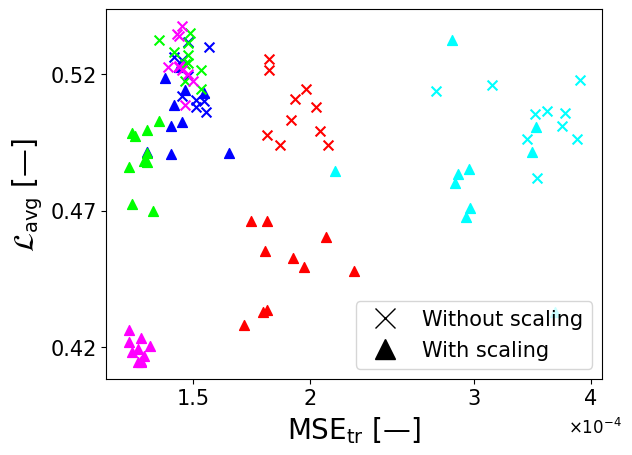

In [32]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/DNS/"
name = f"effect scaling - cost-MSEtr - DNS - power 4 - hyper - logx.png"

size_marker = 50

plt.scatter(MSEtr_35aW, cost_without[0:10], c = "r", marker = "x", s=size_marker)
plt.scatter(MSEtr_35a, cost_with[0:10], c = "r", marker = "^", s=size_marker)

plt.scatter(MSEtr_35acW, cost_without[40:50], c = "b", marker = "x", s=size_marker)
plt.scatter(MSEtr_35ac, cost_with[40:50], c = "b", marker = "^", s=size_marker)

plt.scatter(MSEtr_32j, cost_without[10:20], c = "aqua", marker = "x", s=size_marker)
plt.scatter(MSEtr_33b, cost_with[20:30], c = "aqua", marker = "^", s=size_marker)

plt.scatter(MSEtr_35abW, cost_without[20:30], c = "lime", marker = "x", s=size_marker)
plt.scatter(MSEtr_35ab, cost_with[30:40], c = "lime", marker = "^", s=size_marker)

plt.scatter(MSEtr_tscaleW, cost_without[30:40], c = "fuchsia", marker = "x", s=size_marker)
plt.scatter(MSEtr_tscale, cost_with[10:20], c = "fuchsia", marker = "^", s=size_marker)

plt.xlabel(r'$\mathrm{MSE}_{\mathrm{tr}}$' + ' [\u2014]', fontsize=20)
plt.ylabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20)

without_scaling = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=10, label="Without scaling")
with_scaling = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label="With scaling")
plt.legend(handles=[without_scaling, with_scaling], fontsize=15, scatterpoints=1, markerscale=1.5)

plt.xscale("log")
plt.xticks([1.5, 2, 3, 4], fontsize = 15)
plt.yticks([0.42, 0.47, 0.52], fontsize = 15)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:g}"))

plt.text(1.04, -0.13, r'$\times 10^{-4}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', horizontalalignment='right')

if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')

plt.show()

In [6]:
test = np.load("data-files/costs/costs_Tr35a_s5-bw_-6_2_100-p_1-ver_sh_1.npy")

names_without = ["35aW", "32j", "35abW", "32tFullW", "35acW"] #, "32j"
names_with = ["35a", "32tscaleFull", "33b", "35ab", "35ac"]

cost_PVsource_without = []
cost_PVsource_with = []

for i in range(len(names_with)):
    for j in range(10):

        PVsourceW = np.load(f"data-files/costs/costs_Tr{names_without[i]}_s{j}-bw_-6_2_100-p_1-ver_sh_1.npy")
        PVsource = np.load(f"data-files/costs/costs_Tr{names_with[i]}_s{j}-bw_-6_2_100-p_1-ver_sh_1.npy")

        cost_PVsource_without.append(PVsourceW[-1])
        cost_PVsource_with.append(PVsource[-1])

In [34]:
correlationAvgcostPVsourcecost = np.corrcoef(cost_without + cost_with, cost_PVsource_without+cost_PVsource_with)[0, 1]
print(f"The correlation between the average cost and the PVsource cost is {np.round(correlationAvgcostPVsourcecost,3)}")

The correlation between the average cost and the PVsource cost is 0.953


<h3> Dhat curves

In [7]:
path_variance = "data-files/costs/"

name_without = "variance_Tr35aW_s9-bw_-6_2_100.npy"
name_with = "variance_Tr35a_s3-bw_-6_2_100.npy"

penalty_function = 'log-sigma-over-peak'
power = 4
vertical_shift = 1

variance_without = np.load(f"{path_variance}{name_without}", allow_pickle=True).item()
variance_with = np.load(f"{path_variance}{name_with}", allow_pickle=True).item()

(derivative_without, bandwidth_values_without, max_derivative_without) = normalized_variance_derivative(variance_without)
(derivative_with, bandwidth_values_with, max_derivative_with) = normalized_variance_derivative(variance_with)

keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

costsWithout = cost_function_normalized_variance_derivative(variance_without,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsWith = cost_function_normalized_variance_derivative(variance_with,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

C:\Windows\Temp\ipykernel_17676\1997893199.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


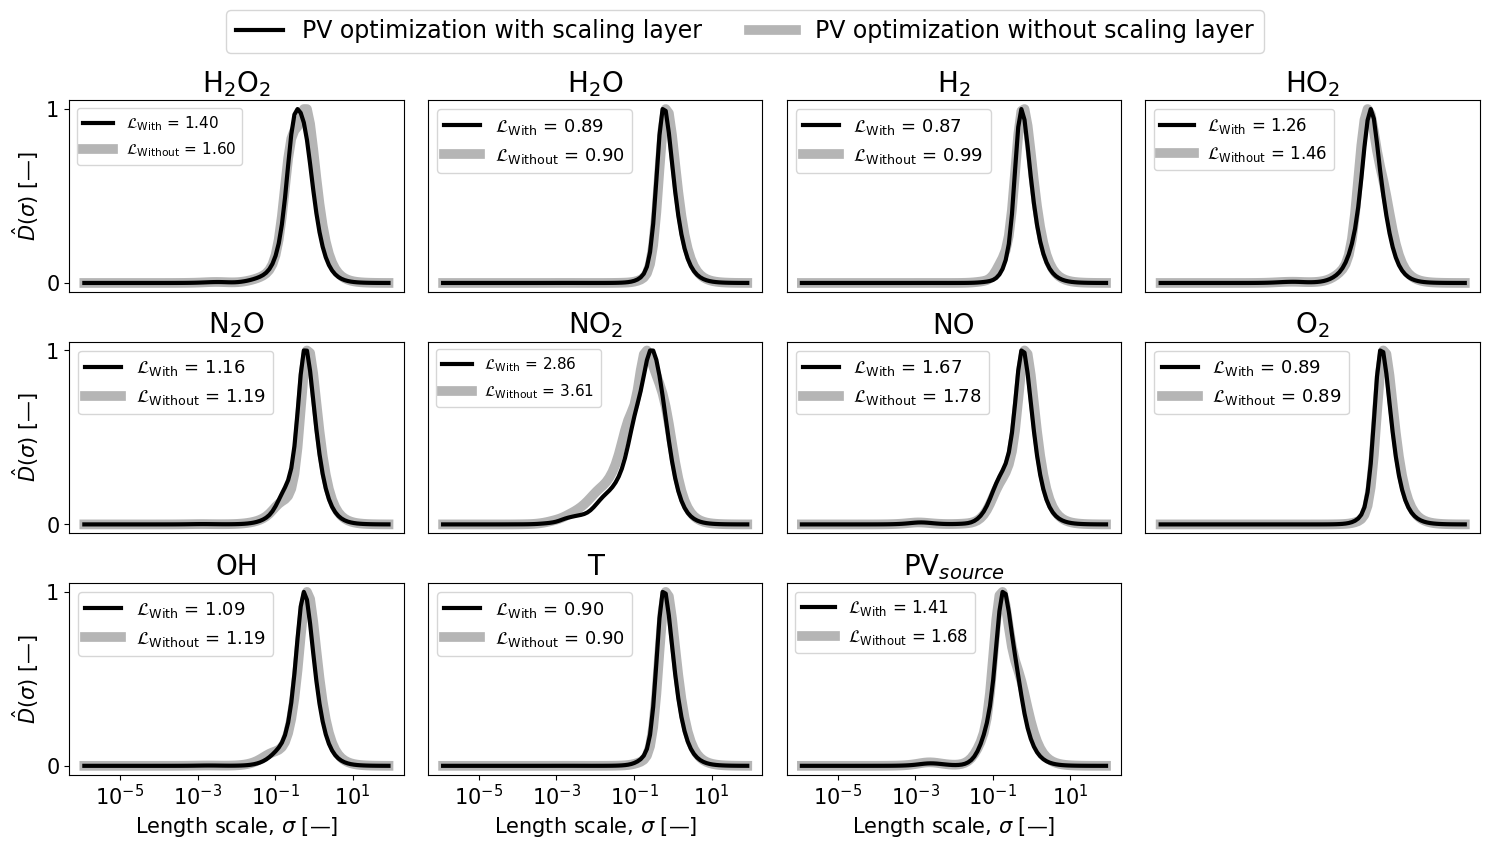

In [8]:
rows, cols = 3,4

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Dhat plots - DNS/"
name = "Dhat without and with scaling layer (35a_s3 and 35aW_s9) combined - DNS - with cost - with = - black.png"
namePdf = "Dhat without and with scaling layer (35a_s3 and 35aW_s9) combined - DNS - with cost - with = - black.pdf"

greys = cm.get_cmap('Greys')

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]
    ax.plot(bandwidth_values_with, derivative_with[key], color = greys(1.0), zorder = 2,
            label = rf'$\mathcal{{L}}_{{\mathrm{{With}}}}$ = {costsWith[i]:.2f}', linewidth = 3)
    ax.plot(bandwidth_values_without, derivative_without[key], color = greys(0.4), zorder = 1,
            label = rf'$\mathcal{{L}}_{{\mathrm{{Without}}}}$ = {costsWithout[i]:.2f}', linewidth = 7, linestyle = "-")
    ax.set_xscale("log")
    if(i>len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_yticks([0, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([])
    ax.tick_params(axis="y", labelsize=15)
    
    ax.legend(fontsize = 13)
    if(key in ["HO2", "PV1"]):
         ax.legend(fontsize = 12)
    elif(key in ["H2O2", "NO2"]):
         ax.legend(fontsize = 11)           

    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")

    ax.set_title(rf"{key}", fontsize=20)
    


for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, _ = axes[0].get_legend_handles_labels()
labels = ["PV optimization with scaling layer", "PV optimization without scaling layer"]

fig.legend(
    handles=handles,
    labels = labels,
    fontsize=17,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.07)
)

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
        plt.savefig(f"{pathSave}{namePdf}", bbox_inches="tight")
plt.show()

***
<h2> For the autoignition dataset

In [10]:
#MSE expressed in 10^-5

#Tr0D-2p
MSE_2p = [0.32, 0.2, 0.3, 0.2] #210.04, (index 0) 0.32, also remove index 1 for NN
cost_2p = [0.53896, 0.3546, 0.35349, 0.35073] #2.8978, [0.53896, index 0 and 1

#Tr0D2pW
MSE_2pW = [3.17, 1.05, 3.18, 3.13] #7.91, (index 2)
cost_2pW = [0.66176, 0.54727, 0.6499, 0.64299] #0.95764,

#Tr0D-2q
MSE_2q = [0.2, 0.17, 0.17, 0.21, 0.19]
cost_2q = [0.36459, 0.36847, 0.36461, 0.35516, 0.35816]

#Tr0D2qW
MSE_2qW = [0.63, 0.66, 0.9, 2.52, 0.82]
cost_2qW = [0.4668, 0.46265, 0.50216, 0.59955, 0.50385]

# Tr0D-2r
MSE_2r = [0.17, 0.25, 0.17, 0.18, 0.15]
cost_2r = [0.39365, 0.36274, 0.35745, 0.36444, 0.38583]

# Tr0D-2rW
MSE_2rW = [0.86, 0.84, 0.85, 0.87, 0.84]
cost_2rW = [0.54741, 0.55139, 0.52779, 0.53139, 0.55545]

# Tr0D-2s
MSE_2s = [0.24, 0.18, 0.25, 0.21, 0.17]
cost_2s = [0.34945, 0.38794, 0.354, 0.35412, 0.42082]

# Tr0D-2sW
MSE_2sW = [0.89, 0.75, 0.74, 0.82, 0.66]
cost_2sW = [0.51496, 0.55263, 0.56014, 0.52749, 0.51359]

# Tr0D-2t
MSE_2t = [0.17, 0.2, 0.18, 0.17, 0.16]
cost_2t = [0.35524, 0.37376, 0.36697, 0.39215, 0.36233]

# Tr0D-2tW
MSE_2tW = [0.76, 0.88, 0.79, 0.86, 0.82]
cost_2tW = [0.53945, 0.56854, 0.54386, 0.5544, 0.55837]

# Tr0D-2u
MSE_2u = [0.16, 0.17, 0.19, 0.19, 0.18]
cost_2u = [0.40846, 0.38086, 0.35749, 0.37416, 0.35534]

# Tr0D-2uW
MSE_2uW = [0.62, 0.67, 0.75, 0.77, 0.87]
cost_2uW = [0.50321, 0.49473, 0.5391, 0.54069, 0.56222]



#Total

#Arrays with scaling
MSE_auto = MSE_2p + MSE_2q + MSE_2r + MSE_2s + MSE_2t + MSE_2u
cost_auto = cost_2p + cost_2q + cost_2r + cost_2s + cost_2t + cost_2u

#Arrays without scaling
MSE_autoW = MSE_2pW + MSE_2qW + MSE_2rW + MSE_2sW + MSE_2tW + MSE_2uW
cost_autoW = cost_2pW + cost_2qW + cost_2rW + cost_2sW + cost_2tW + cost_2uW

### Load MSE NN values

In [10]:
namesWithout_0D = ["2pW", "2qW", "2rW", "2sW","2tW", "2uW"] 
namesWith_0D = ["2p", "2q", "2r", "2s","2t", "2u"]

MSE_NN_without_0D = []
MSE_NN_with_0D = []

path_MSE_NN = "data-files/MSE_NN/"

for nameWithout, nameWith in zip(namesWithout_0D, namesWith_0D):
    MSE_NN_without_0D.append(np.load(f"{path_MSE_NN}MSE_Val_NN_Tr0D-{nameWithout}.npy"))
    MSE_NN_with_0D.append(np.load(f"{path_MSE_NN}MSE_Val_NN_Tr0D-{nameWith}.npy"))

MSE_NN_without_0D = np.array(MSE_NN_without_0D).flatten().tolist()
MSE_NN_with_0D = np.array(MSE_NN_with_0D).flatten().tolist()

MSE_NN_without_0D.pop(2)
MSE_NN_with_0D.pop(0) #remove first and second index
MSE_NN_with_0D.pop(0)

0.00026559097895213394

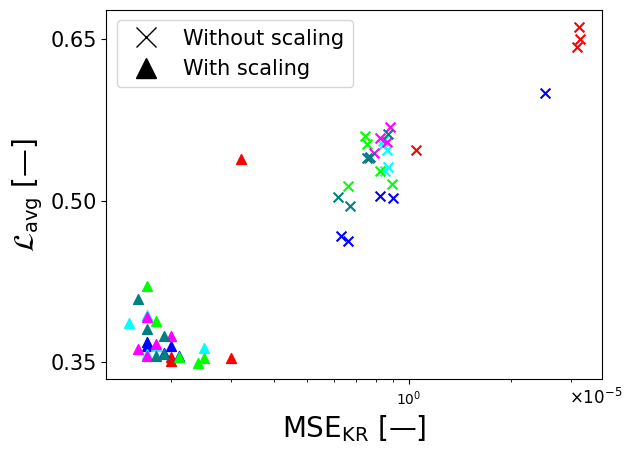

In [7]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/"
name = f"effect scaling - autoigntion - link same hyper-set - xlog.png"

size_marker = 50

plt.scatter(MSE_2pW, cost_2pW, c = "r", marker = "x", s=size_marker)
plt.scatter(MSE_2p, cost_2p, c = "r", marker = "^", s=size_marker)

plt.scatter(MSE_2qW, cost_2qW, c = "b", marker = "x", s=size_marker)
plt.scatter(MSE_2q, cost_2q, c = "b", marker = "^", s=size_marker)

plt.scatter(MSE_2rW, cost_2rW, c = "aqua", marker = "x", s=size_marker)
plt.scatter(MSE_2r, cost_2r, c = "aqua", marker = "^", s=size_marker)

plt.scatter(MSE_2sW, cost_2sW, c = "lime", marker = "x", s=size_marker)
plt.scatter(MSE_2s, cost_2s, c = "lime", marker = "^", s=size_marker)

plt.scatter(MSE_2tW, cost_2tW, c = "fuchsia", marker = "x", s=size_marker)
plt.scatter(MSE_2t, cost_2t, c = "fuchsia", marker = "^", s=size_marker)

plt.scatter(MSE_2uW, cost_2uW, c = "teal", marker = "x", s=size_marker)
plt.scatter(MSE_2u, cost_2u, c = "teal", marker = "^", s=size_marker)

plt.xlabel(r'$\mathrm{MSE}_{\mathrm{KR}}$' + ' [\u2014]', fontsize=20)
plt.ylabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20)

without_scaling = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=10, label="Without scaling")
with_scaling = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label="With scaling")
plt.legend(handles=[without_scaling, with_scaling], fontsize=15, scatterpoints=1, markerscale=1.5)

plt.xscale('log')

#plt.xticks([0, 1, 2, 3], fontsize = 15)
plt.yticks([0.35, 0.50, 0.65], fontsize = 15)

plt.text(1.04, -0.05, r'$\times 10^{-5}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', horizontalalignment='right')

if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')

plt.show()

<h3> Cost: PVsource vs avg

In [ ]:
names_without_0D = ["0D-2pW", "0D-2qW", "0D-2rW", "0D-2sW", "0D-2tW", "0D-2uW"] #, "32j"
names_with_0D = ["0D-2p", "0D-2q", "0D-2r", "0D-2s", "0D-2t", "0D-2u"]

cost_PVsource_without_0D = []
cost_PVsource_with_0D = []

for i in range(len(names_with_0D)):
    for j in range(5):

        PVsourceW_0D = np.load(f"data-files/costs/costs_Tr{names_without_0D[i]}_s{j}-bw_-6_2_100-p_4-ver_sh_1-dataset_autoignition.npy")
        PVsource_0D = np.load(f"data-files/costs/costs_Tr{names_with_0D[i]}_s{j}-bw_-6_2_100-p_4-ver_sh_1-dataset_autoignition.npy")

        cost_PVsource_without_0D.append(PVsourceW_0D[-1])
        cost_PVsource_with_0D.append(PVsource_0D[-1])


#with: remove index 0
#without: remove index 2
cost_PVsource_with_0D.pop(0)
cost_PVsource_without_0D.pop(2)

0.9500907529025322

<h3> f-PV manifolds

In [12]:
filename_autoignition = "isochoric-adiabatic-closed-HR-H2-air-lin_Z_0.015_0.035_100-T0_900-"
path_data_autoignition = "data-files/autoignition/"
path_data = "data-files/"

#create all the datasets
mixture_fractions_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fraction.csv") #1 x nbr_timesteps
mixture_fractions_test = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fractions-test-trajectories.csv") #1 x nbr_test_trajectories
state_space_names = np.genfromtxt(f"{path_data_autoignition}{filename_autoignition}state-space-names.csv", delimiter=",", dtype=str)
state_space_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space.csv", names = state_space_names)
state_space_source_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space-sources.csv", names = state_space_names)
time_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}time.csv") #1 x nbr_timesteps

In [ ]:
filename_model = "Xu-AE-opt_adam-epo_100000-lr_0.025-date_18Feb2025-hour_22h58_Tr0D-2qW_s1"
filename_metadata = filename_model + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"]=="autoignition_augm" else loader.metadata["idx species removed"]
id_model = loader.metadata["Training_id"]
model = loader.loadModel()

weight_inversion = True
if(weight_inversion):
    with torch.no_grad():  # Ensures we do not track gradients for this operation
        model.encoder_species.weight.mul_(-1)

state_space_names_DNS = np.genfromtxt(f"{path_data}Xu-state-space-names.csv", delimiter=",", dtype=str)

#create a np array in the format for the DNS dataset/optimized PV
state_space_train_DNS = state_space_train[state_space_names_DNS].to_numpy()
state_space_source_train_DNS = state_space_source_train[state_space_names_DNS].to_numpy()
print(state_space_source_train_DNS.shape)

PV_optimized_train = model.get_PV(torch.from_numpy(np.delete(state_space_train_DNS, idx_species_removed, axis=1))).detach().numpy()
PV_optimized_min_train = PV_optimized_train.min()
PV_optimized_max_train = PV_optimized_train.max()
PV_optimized_train_scaled = (PV_optimized_train - PV_optimized_min_train)/(PV_optimized_max_train - PV_optimized_min_train)
f_PV_optimized_train = np.hstack((mixture_fractions_train.reshape(-1,1), PV_optimized_train.reshape(-1,1)))
f_PV_optimized_train_scaled = np.hstack((mixture_fractions_train.reshape(-1,1), PV_optimized_train_scaled.reshape(-1,1)))
PV_optimized_source_train = model.get_PV(torch.from_numpy(np.delete(state_space_source_train_DNS, idx_species_removed, axis=1))).detach().numpy()

FileNotFoundError: [Errno 2] No such file or directory: 'metadata//Xu-AE-opt_adam-epo_100000-lr_0.025-date_18Feb2025-hour_22h58_Tr0D-2qW_s1_metadata.pkl'

In [ ]:
rows, cols = 3,4

keysSpecies = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH']
keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

Xu_optimized = "Optimized"

save = True
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Autoignition/f-PV manifold/"
name = f"f-PV manifolds - Autoignition - coloured by QoIs - {Xu_optimized} - without QoI log() - {id_model}.png"

fig, axes = plt.subplots(rows, cols, figsize=(12,9))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]

    if(Xu_optimized.lower() == "xu"):
         dataPV_fl = PV_Xu_train
    elif(Xu_optimized.lower() == "optimized"):
         dataPV_fl = PV_optimized_train
    else:
         raise ValueError("Variable 'Xu_optimized' has an invalid value; Choose either 'xu' or 'optimized'.")

    if(key in keysSpecies or key  == "T"):
         dataColor = state_space_train[key]
    elif(key == "PV1"):
         if(Xu_optimized.lower() == "xu"):
            dataColor = PV_Xu_train_source
         elif(Xu_optimized.lower() == "optimized"):
            dataColor = PV_optimized_source_train
         

    ax.scatter(mixture_fractions_train, dataPV_fl, c = dataColor, cmap = "viridis", s=1)

    if(i>len(keys)-cols):
        ax.set_xticks([0.015, 0.035])
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel("f [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_ylabel(f'{"Optimized" if Xu_optimized.lower() == "optimized" else "Heuristic"} PV [\u2014]', fontsize = 15)
    ax.set_yticks([])
    
    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")

    ax.set_title(rf"{key}", fontsize=20)


for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, labels = axes[0].get_legend_handles_labels()

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
plt.show()

<h3> Dhat curves

In [13]:
path_variance = "data-files/costs/"

name_without = "variance_Tr0D-2qW_s1-bw_-6_2_100-dataset_autoignition.npy"
name_with = "variance_Tr0D-2q_s0-bw_-6_2_100-dataset_autoignition.npy"

penalty_function = 'log-sigma-over-peak'
power = 4
vertical_shift = 1

variance_without = np.load(f"{path_variance}{name_without}", allow_pickle=True).item()
variance_with = np.load(f"{path_variance}{name_with}", allow_pickle=True).item()

(derivative_without, bandwidth_values_without, max_derivative_without) = normalized_variance_derivative(variance_without)
(derivative_with, bandwidth_values_with, max_derivative_with) = normalized_variance_derivative(variance_with)

keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

costsWithout = cost_function_normalized_variance_derivative(variance_without,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsWith = cost_function_normalized_variance_derivative(variance_with,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

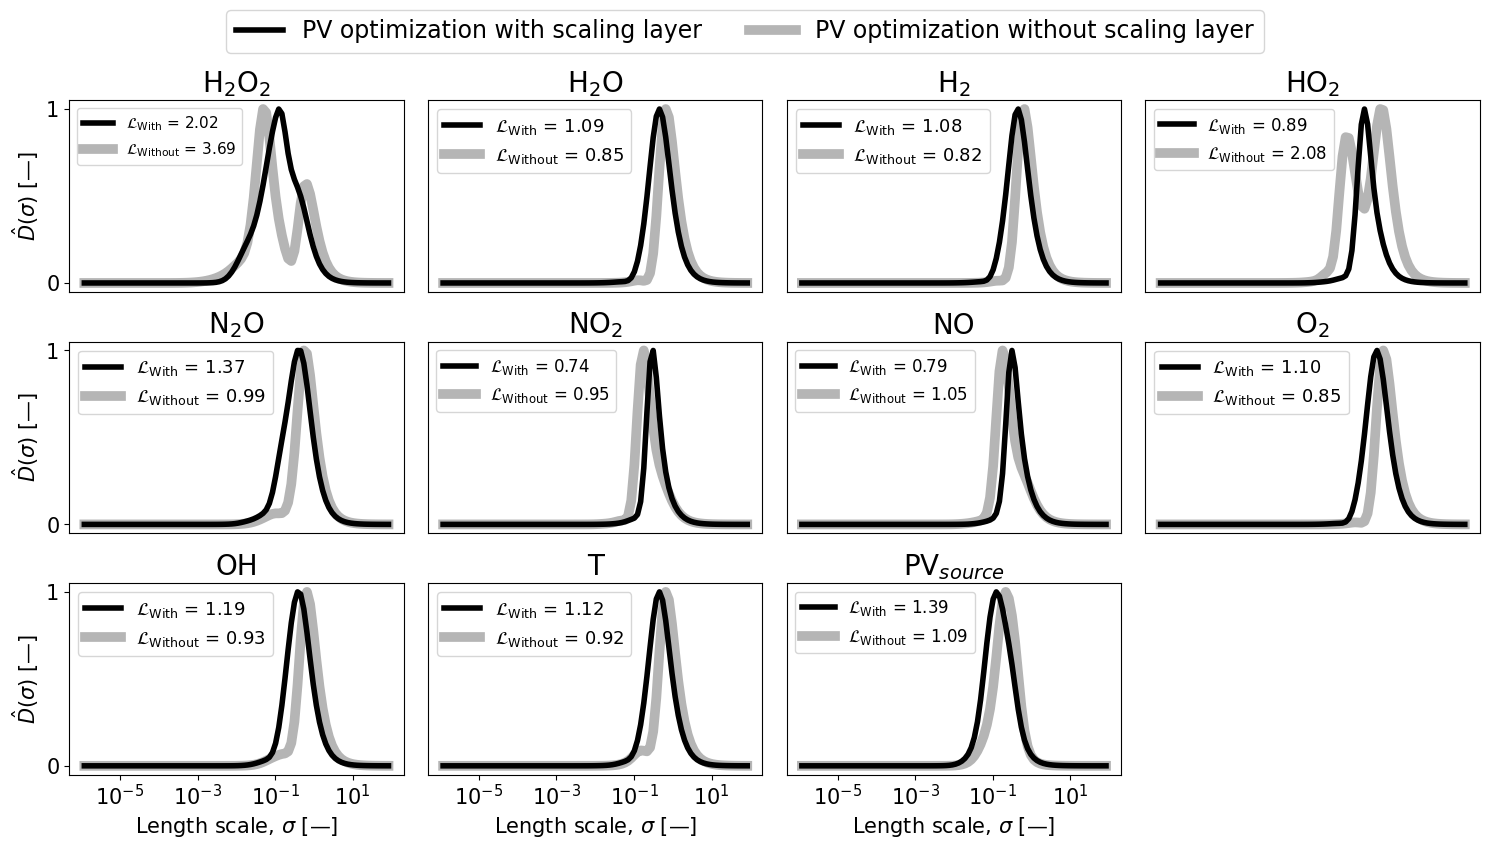

In [14]:
rows, cols = 3,4

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Dhat plots - Autoignition/"
name = "Dhat without and with scaling layer (0D-2q_s0 and 0D-2qW_s1) combined - Autoignition - with cost - with = - black.png"
namePdf = "Dhat without and with scaling layer (0D-2q_s0 and 0D-2qW_s1) combined - Autoignition - with cost - with = - black.pdf"

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]
    ax.plot(bandwidth_values_with, derivative_with[key], color = greys(1.0), zorder = 2,
            label = rf'$\mathcal{{L}}_{{\mathrm{{With}}}}$ = {costsWith[i]:.2f}', linewidth = 4)
    ax.plot(bandwidth_values_without, derivative_without[key], color = greys(0.4), zorder = 1,
            label = rf'$\mathcal{{L}}_{{\mathrm{{Without}}}}$ = {costsWithout[i]:.2f}', linewidth = 7, linestyle = "-")
    ax.set_xscale("log")
    if(i>len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_yticks([0, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([])
    ax.tick_params(axis="y", labelsize=15)
    
    if(key == "H2O2"):
         ax.legend(fontsize = 11)
    elif(key in ["HO2", "NO2", "NO", "PV1"]):
         ax.legend(fontsize = 12)
    else:
         ax.legend(fontsize = 13)

    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")

    ax.set_title(rf"{key}", fontsize=20)
    


for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, _ = axes[0].get_legend_handles_labels()
labels = ["PV optimization with scaling layer", "PV optimization without scaling layer"]

fig.legend(
    handles=handles,
    labels = labels,
    fontsize=17,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.07)
)

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
        plt.savefig(f"{pathSave}{namePdf}", bbox_inches="tight")
plt.show()

## Combine all plots together (NN)

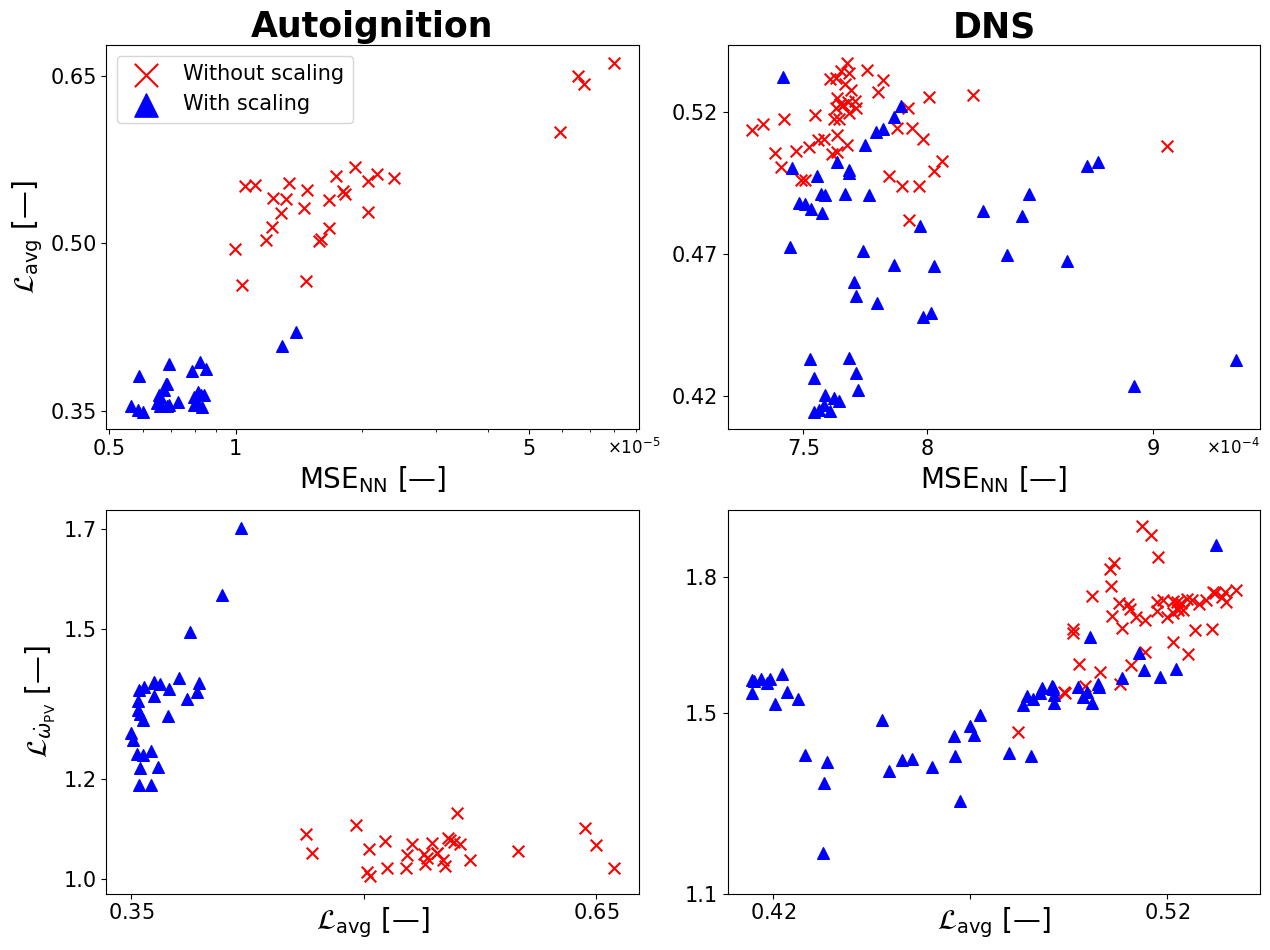

In [ ]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/"
name = f"curves MSE and costs for effect of scaling - Autoignition and DNS.png"
namePdf = f"curves MSE and costs for effect of scaling - Autoignition and DNS.pdf"

fig, ax = plt.subplots(2, 2, figsize=(12.8, 9.6))  # adjust size if needed
size_marker = 70

# %Autoignition MSE vs cost (top left)
ax[0, 0].scatter(MSE_NN_without_0D, cost_autoW, label="Without scaling", c="r", marker="x", s=size_marker)
ax[0, 0].scatter(MSE_NN_with_0D, cost_auto, label="With scaling", c="b", marker="^", s=size_marker)
ax[0, 0].set_xlabel(r'$\mathrm{MSE}_{\mathrm{NN}}$' + ' [\u2014]', fontsize=20)
ax[0, 0].set_ylabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20)
ax[0, 0].legend(fontsize=15, scatterpoints=1, markerscale=2)
ax[0, 0].set_xscale("log")
ax[0, 0].set_xticks([0.000005, 0.00001, 0.00005])
ax[0, 0].set_xticklabels([r'$5$', r'$10$', r'$50$'], fontsize=15)
ax[0, 0].set_yticks([0.35, 0.50, 0.65])
ax[0, 0].tick_params(axis='y', labelsize=15)
ax[0, 0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x*10**5:g}"))
ax[0, 0].text(1.04, -0.05, r'$\times 10^{-5}$', transform=ax[0, 0].transAxes,
              fontsize=12, va='center', ha='right')

# %Autoignition cost PVsource vs avg cost (bottom left)
ax[1, 0].scatter(cost_autoW, cost_PVsource_without_0D, label="Without scaling", c="r", marker="x", s=size_marker)
ax[1, 0].scatter(cost_auto, cost_PVsource_with_0D, label="With scaling", c="b", marker="^", s=size_marker)
ax[1, 0].set_xlabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20, labelpad=-13)
ax[1, 0].set_ylabel(r'$\mathcal{L}_{\dot{\omega}_{\mathrm{PV}}}$' + ' [\u2014]', fontsize=20)
ax[1, 0].set_xticks([0.35, 0.50, 0.65])
ax[1, 0].set_xticklabels([r'$0.35$', '', r'$0.65$'])
ax[1, 0].set_yticks([1, 1.2, 1.5, 1.7])
ax[1, 0].tick_params(axis='x', labelsize=15)
ax[1, 0].tick_params(axis='y', labelsize=15)

# %DNS MSE vs cost (top right)
ax[0, 1].scatter(MSE_NN_without, cost_without, label="Without scaling", c="r", marker="x", s=size_marker)
ax[0, 1].scatter(MSE_NN_with, cost_with, label="With scaling", c="b", marker="^", s=size_marker)
ax[0, 1].set_xlabel(r'$\mathrm{MSE}_{\mathrm{NN}}$' + ' [\u2014]', fontsize=20)
# Remove legend here to avoid duplicates
ax[0, 1].set_xscale("log")
ax[0, 1].set_xticks([0.00075, 0.0008, 0.0009])
ax[0, 1].set_xticklabels([r'$75$', r'$80$', r'$90$'], fontsize=15)
ax[0, 1].set_yticks([0.42, 0.47, 0.52])
ax[0, 1].tick_params(axis='y', labelsize=15)
ax[0, 1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x*10**4:g}"))
ax[0, 1].xaxis.set_minor_locator(ticker.NullLocator())
ax[0, 1].text(1, -0.05, r'$\times 10^{-4}$', transform=ax[0, 1].transAxes,
              fontsize=12, va='center', ha='right')

# %DNS costs (bottom right)
ax[1, 1].scatter(cost_without, cost_PVsource_without, label="Without scaling layer", c="r", marker="x", s=size_marker)
ax[1, 1].scatter(cost_with, cost_PVsource_with, label="With scaling layer", c="b", marker="^", s=size_marker)
ax[1, 1].set_xlabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20, labelpad=-13)
# Remove legend here to avoid duplicates
ax[1, 1].set_xticks([0.42, 0.47,  0.52])
ax[1, 1].set_xticklabels([r'$0.42$', '', r'$0.52$'])
ax[1, 1].set_yticks([1.1, 1.5, 1.8])
ax[1, 1].tick_params(axis='x', labelsize=15)
ax[1, 1].tick_params(axis='y', labelsize=15)

ax[0, 0].set_title("Autoignition", fontsize=25, fontweight='bold')
ax[0, 1].set_title("DNS", fontsize=25, fontweight='bold')


plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=300)
    plt.savefig(pathSave + namePdf, bbox_inches = "tight")
plt.show()

## Combine all plots (Kreg)

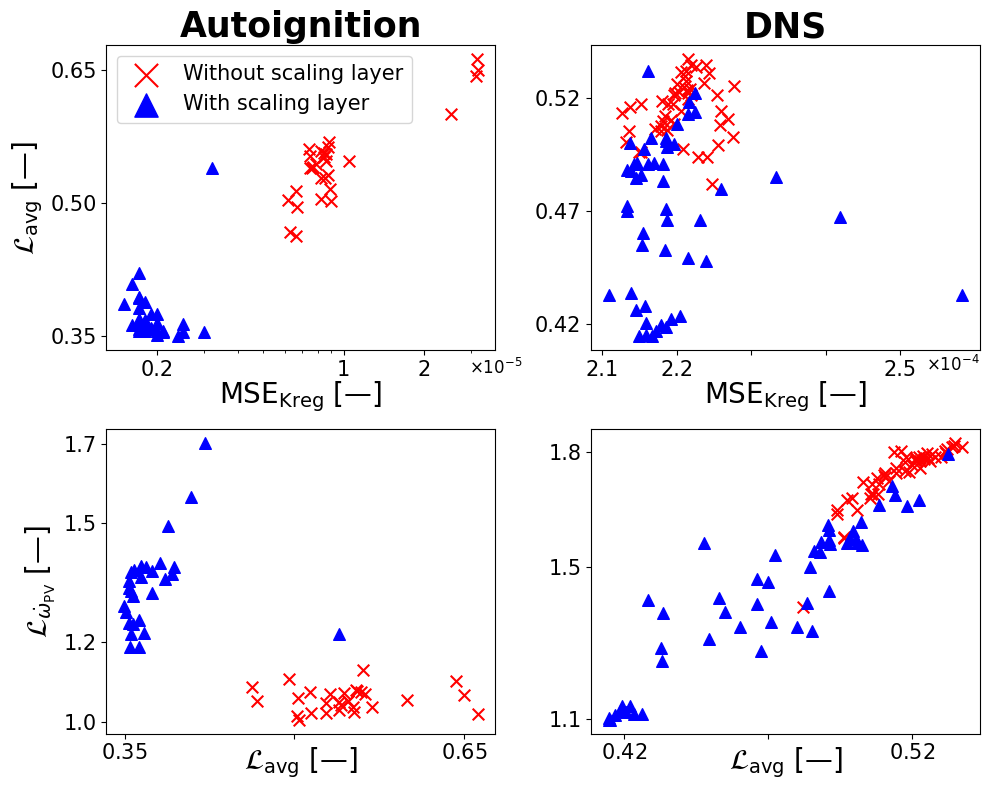

In [ ]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/"
name = f"curves MSE Kreg and costs for effect of scaling - Autoignition and DNS - log.png"
namePdf = f"curves MSE Kreg and costs for effect of scaling - Autoignition and DNS - log.pdf"

fig, ax = plt.subplots(2, 2, figsize=(10, 8))  # adjust size if needed
size_marker = 70

# %Autoignition MSE vs cost (top left)
ax[0, 0].scatter(MSE_autoW, cost_autoW, label="Without scaling layer", c="r", marker="x", s=size_marker)
ax[0, 0].scatter(MSE_auto, cost_auto, label="With scaling layer", c="b", marker="^", s=size_marker)
ax[0, 0].set_xlabel(r'$\mathrm{MSE}_{\mathrm{Kreg}}$' + ' [\u2014]', fontsize=20, labelpad = 0)
ax[0, 0].set_ylabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20)
ax[0, 0].legend(fontsize=15, scatterpoints=1, markerscale=2, loc = "upper left")
ax[0, 0].set_xscale("log")
ax[0, 0].set_xticks([0.2, 1, 2])
ax[0, 0].set_xticklabels(["0.2", '1', "2"])
ax[0, 0].set_yticks([0.35, 0.50, 0.65])
ax[0, 0].tick_params(axis='both', labelsize=15)
ax[0, 0].text(1.07, -0.06, r'$\times 10^{-5}$', transform=ax[0, 0].transAxes,
              fontsize=12, va='center', ha='right')

# %Autoignition cost PVsource vs avg cost (bottom left)
ax[1, 0].scatter(cost_autoW, cost_PVsource_without_0D, label="Without scaling layer", c="r", marker="x", s=size_marker)
ax[1, 0].scatter(cost_auto, cost_PVsource_with_0D, label="With scaling layer", c="b", marker="^", s=size_marker)
ax[1, 0].set_xlabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20, labelpad=-13)
ax[1, 0].set_ylabel(r'$\mathcal{L}_{\dot{\omega}_{\mathrm{PV}}}$' + ' [\u2014]', fontsize=20)
ax[1, 0].set_xticks([0.35, 0.50, 0.65])
ax[1, 0].set_xticklabels([r'$0.35$', '', r'$0.65$'])
ax[1, 0].set_yticks([1, 1.2, 1.5, 1.7])
ax[1, 0].tick_params(axis='x', labelsize=15)
ax[1, 0].tick_params(axis='y', labelsize=15)

# %DNS MSE vs cost (top right)
ax[0, 1].scatter(MSE_without, cost_without, label="Without scaling layer", c="r", marker="x", s=size_marker)
ax[0, 1].scatter(MSE_with, cost_with, label="With scaling layer", c="b", marker="^", s=size_marker)
ax[0, 1].set_xlabel(r'$\mathrm{MSE}_{\mathrm{Kreg}}$' + ' [\u2014]', fontsize=20, labelpad = 0)
ax[0, 1].set_xticks([2.1, 2.2, 2.3, 2.4, 2.5])
ax[0, 1].set_xticklabels(["2.1", "2.2", "", "", "2.5"])
ax[0, 1].set_yticks([0.42, 0.47, 0.52])
ax[0, 1].tick_params(axis='both', labelsize=15)
ax[0, 1].text(1, -0.05, r'$\times 10^{-4}$', transform=ax[0, 1].transAxes,
              fontsize=12, va='center', ha='right')

# %DNS costs (bottom right)
ax[1, 1].scatter(cost_without, cost_PVsource_without, label="Without scaling layer", c="r", marker="x", s=size_marker)
ax[1, 1].scatter(cost_with, cost_PVsource_with, label="With scaling layer", c="b", marker="^", s=size_marker)
ax[1, 1].set_xlabel(r'$\mathcal{L}_{\mathrm{avg}}$' + ' [\u2014]', fontsize=20, labelpad=-13)
ax[1, 1].set_xticks([0.42, 0.47,  0.52])
ax[1, 1].set_xticklabels([r'$0.42$', '', r'$0.52$'])
ax[1, 1].set_yticks([1.1, 1.5, 1.8])
ax[1, 1].tick_params(axis='x', labelsize=15)
ax[1, 1].tick_params(axis='y', labelsize=15)

ax[0, 0].set_title("Autoignition", fontsize=25, fontweight='bold')
ax[0, 1].set_title("DNS", fontsize=25, fontweight='bold')


plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=300)
    plt.savefig(pathSave + namePdf, bbox_inches = "tight")
plt.show()